# Welcome to the icet tutorial!
In this first part of the tutorial we will construct a set of Ag-Pd alloy supercells. In the real world, one would then calculate the energy of these structures, usually with DFT. As DFT calculations are beyond the scope of this tutorial, we will here simply show how the structures can be generated, and then provide you with a database with calculated structures for part 2 of the tutorial.

There are many ways to create structures to be used in a cluster expansion. One simple method is to create a fairly large supercell, and decorate it with Ag and Pd by random. Unfortunately, such a simple method will typically result in structures that are energetically very similar, as they would all, more or less, represent the random alloy. A more systematic approach is to create *all* possible structures having a certain size. This is usually referred to as "enumeration". In this tutorial we will show how to do this with icet.
More information can be found [here](https://icet.materialsmodeling.org/advanced_topics/structure_enumeration.html).

## Structure enumeration

The first step is to create the primitive cell. Here, we create an Ag fcc cell with lattice parameter 4 Angstrom.

In [1]:
from ase.build import bulk

prim = bulk('Ag', a=4.0)

Then we are ready to start the enumeration. Here, we enumerate all supercells having up to 8 atoms in the supercell. We save these in an ASE database.  For future plotting, we also save the concentration and size of the structures in a list. This should take no more than a few seconds.

In [2]:
from ase.db import connect
from icet.tools import enumerate_structures

db = connect('Ag-Pd-to-be-calculated.db')
data = []
for structure in enumerate_structures(prim, range(9), ['Ag', 'Pd']):
    db.write(structure)
    
    c_Pd = structure.get_chemical_symbols().count('Pd') / len(structure)
    data.append(dict(c_Pd=c_Pd, natoms=len(structure)))

If you now look in your database (for example with `ase db Ag-Pd-to-be-calculated.db` from the command line), you should find that your database includes 631 structures. We emphasize that these 631 structures are *all* existing symmetrically inequivalent supercells with 8 atoms or less.

We now have a set of structures that we can calculate with DFT. For the next part of the tutorial, we will provide you with a database of already calculated structures.

To get a better feel for the structures just generated we plot histograms over the concentrations in the structures as well as the number of atoms in the structures.

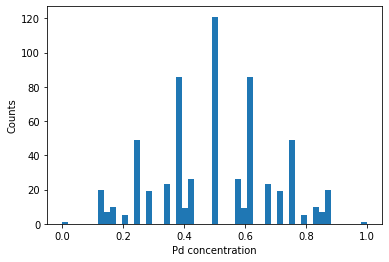

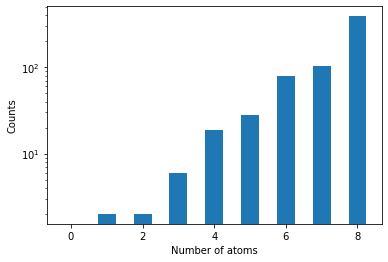

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

plt.figure()
plt.hist(df.c_Pd, bins=51)
plt.xlabel('Pd concentration')
plt.ylabel('Counts')

plt.figure()
plt.bar(range(9), np.bincount(df.natoms), width=0.5, align='center', log=True)
plt.xlabel('Number of atoms')
plt.ylabel('Counts');

Two things are worth noting: 

1. the number of structures grows very rapidly with supercell size, 

2. the number of structures as a function of concentration is sharply peaked around $c=0.5$ (it gets sharper the larger we go). This is something you may want to consider when constructing a training set so that your training data is not biased towards some concentration, but that is beyond the scope of this tutorial.